[View in Colaboratory](https://colab.research.google.com/github/charleswongzx/machine-learning-01.112/blob/hw2/Machine_Learning_01_112_HW2.ipynb)

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

csv = 'https://www.dropbox.com/s/oqoyy9p849ewzt2/linear.csv?dl=1'
data = np.genfromtxt(csv,delimiter=',')
X = data[:,1:]
Y = data[:,0]

**(a) Let the first 10 entries of the data set be the validation set, and the last 40 entries
be the training set. Concatenate their features into matrices vX and tX, and their
responses into vectors vY and tY. Print the shapes of vX, tX, vY and tY.**

In [4]:
vX = data[:10,1:]
tX = data[-40:,1:]

vY = data[:10,0]
tY = data[-40:,0]

print(vX.shape)
print(tX.shape)
print(vY.shape)
print(tY.shape)

(10, 4)
(40, 4)
(10,)
(40,)


**(b) Write a program in Theano that performs ridge regression by using a regularization
penalty of 1
2kwk2
with
= 0.15. You may use the source codes from Homework 1.
Print the resulting value of w. Which feature may we assume to be irrelevant?**

In [0]:
import theano
import theano.tensor as T
d = X.shape[1] # dimension of feature vectors
n = X.shape[0] # number of training samples
learn_rate = 0.5 # learning rate for gradient descent

x = T.matrix(name='x') # feature matrix
y = T.vector(name='y') # response vector
w = theano.shared(np.zeros((d,1)),name='w') # model parameters

reg_param = 0.15
reg_penalty = T.sum(0.5*reg_param*(w**2))

cost = reg_penalty + T.sum((T.dot(x,w).T - y)**2)/2/n # empirical risk
# cost = T.sum((T.dot(x,w).T - y)**2)/2/n
grad_cost = T.grad(cost, wrt=w) # gradient of the risk

train_model = theano.function(inputs=[],
              outputs=cost,
              updates=[(w, w-learn_rate*grad_cost)],
              givens={x:tX, y:tY})

In [115]:
n_steps = 50
for i in range(n_steps):
  train_model()
#   print(train_model())
print(w.get_value())

[[-0.57709312]
 [ 1.10605842]
 [ 0.05230301]
 [-1.54104119]]


Features in the last column, consisting of ones, is irrelevant.

**(c) Compute the optimal solution using BFGS optimizer from scipy. Below is a simple
example where the cost (or loss) and the gradient is given to the optimizer. Print the resulting value of w for lambda= 0.15.**

In [116]:
from scipy.optimize import fmin_l_bfgs_b as minimize

x = T.matrix(name='x') # feature matrix
y = T.vector(name='y') # response vector
w = theano.shared(np.zeros((d)),name='w') # model parameters

reg_param = 0.15
reg_penalty = T.sum(0.5*reg_param*(w**2))

cost = reg_penalty + T.sum((T.dot(x,w).T - y)**2)/2/n # empirical risk
grad_cost = T.grad(cost, wrt=w) # gradient of the risk

f_loss = theano.function([], cost, givens={x:tX, y:tY})
f_grad = theano.function([], grad_cost, givens={x:tX, y:tY})

def eval_loss(x0):
    w.set_value(x0)
    return f_loss().astype('float64')

def eval_grad(x0):
    w.set_value(x0.astype(np.float32))
    return np.array(f_grad()).flatten().astype('float64')
  
w_init = np.random.rand(4)

opt_result, x, y = minimize(eval_loss,
                      w_init,
                      fprime=eval_grad,
                      maxfun=40)

print(opt_result)

[-0.57709309  1.10605833  0.05230301 -1.54104122]


**d) Write a function
ridge_regression(tX, tY, l)
that takes the training features, training responses and regularizing parameter ,
and outputs the exact solution w for ridge regression with o↵set. Print the resulting
value of w for
= 0.15**

In [10]:
import theano
import theano.tensor as T


def ridge_regression(tX, tY, reg_param=0.15):
  
  d = tX.shape[1] # dimension of feature vectors
  n = tX.shape[0] # number of training samples
  learn_rate = 0.5 # learning rate for gradient descent

  x = T.matrix(name='x') # feature matrix
  y = T.vector(name='y') # response vector
  w = theano.shared(np.zeros((d,1)),name='w') # model parameters

  reg_penalty = T.sum(0.5*reg_param*(w**2))

  cost = reg_penalty + T.sum((T.dot(x,w).T - y)**2)/2/n # empirical risk
  # cost = T.sum((T.dot(x,w).T - y)**2)/2/n
  grad_cost = T.grad(cost, wrt=w) # gradient of the risk

  train_model = theano.function(inputs=[],
                outputs=cost,
                updates=[(w, w-learn_rate*grad_cost)],
                givens={x:tX, y:tY})
  
  n_steps = 50
  for i in range(n_steps):
    train_model()
  return(w.get_value())


w = ridge_regression(tX, tY, 0.15)
print(w)

[[-0.57709312]
 [ 1.10605842]
 [ 0.05230301]
 [-1.54104119]]


**(e) Use the following code to plot graphs of the validation loss and training loss as
varies on a logarithmic scale from
lambda = 10^-5
to
lambda = 10^0.
**

lambda = 0.31622776601683794 minimises vloss.


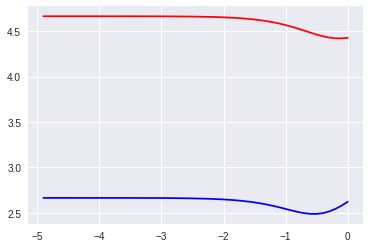

In [15]:
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
min_vloss = 100
optimal_lambda = 100

index = -np.arange(0,5,0.1)
for i in index:
  w = ridge_regression(tX,tY,10**i)
  tloss = tloss+[np.sum((np.dot(tX,w)-tY)**2)/tn/2]
  vloss = vloss+[np.sum((np.dot(vX,w)-vY)**2)/vn/2]
  if vloss[-1] < min_vloss:
    min_vloss = vloss[-1]
    optimal_lambda = 10**i
  
import matplotlib.pyplot as plt
plt.plot(index,np.log(tloss),'r')
plt.plot(index,np.log(vloss),'b')

print('lambda = {} minimises vloss.'.format(optimal_lambda))

# Clustering

In [0]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc as misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

n_colors = 32
pic = 'https://www.dropbox.com/s/bmwwfct2qxjfje4/sutd.png?dl=1'
img = mpimg.imread(pic)
img = img[:,:,:3]

# img = misc.imresize(img, 0.5)

In [9]:
w, h, d = tuple(img.shape)
print(w, h, d)
image_array = np.reshape(img, (w * h, d))

686 1030 3


In [0]:
def recreate_image(palette, labels, w, h):
  d = palette.shape[1]
  image = np.zeros((w, h, d))
  label_idx = 0
  for i in range(w):
    for j in range(h):
      image[i][j] = palette[labels[label_idx]]
      label_idx += 1
  return image

**(a) First, sample 1000 pixels at random from the original image. Use
sklearn.cluster.KMeans
to partition the colors of these pixels into 32 clusters. Extract the cluster centers as
kmeans palette, and use the trained KMeans object to predict the pixel labels.**

In [0]:
sample_indexes = random.sample(range(len(image_array)), 1000)
sample_pixels = []

for i in sample_indexes:
  sample_pixels.append(image_array[i])
  
# A[np.random.randint(A.shape[0], size=1000), :]
  
clusters = KMeans(n_clusters=32).fit(sample_pixels)
kmeans_palette = clusters.cluster_centers_

In [0]:
kmeans_labels = clusters.predict(image_array)

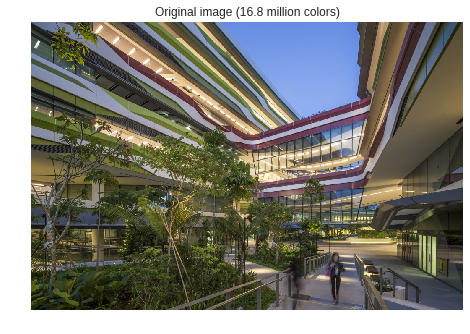

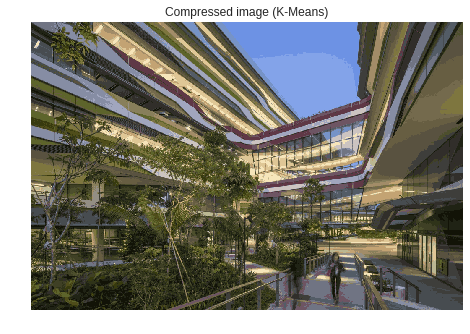

In [13]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (16.8 million colors)')
plt.imshow(img)
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (K-Means)')
plt.imshow(recreate_image(kmeans_palette, kmeans_labels, w, h))
plt.figure(3)
plt.clf()

**(b) Now, sample 32 pixels at random from the original image. Use their colors to form a
random palette. Compute the label for each pixel of the original image by finding
the color in the palette that is closest to the color of the pixel. You may apply
sklearn.metrics.pairwise_distances_argmin
directly to find the closest representative.**

In [0]:
rand_sample_indexes = random.sample(range(len(image_array)), 32)
random_palette = []

for i in rand_sample_indexes:
  random_palette.append(image_array[i])
  
random_palette = np.array(random_palette)
  
random_labels = pairwise_distances_argmin(image_array, random_palette)

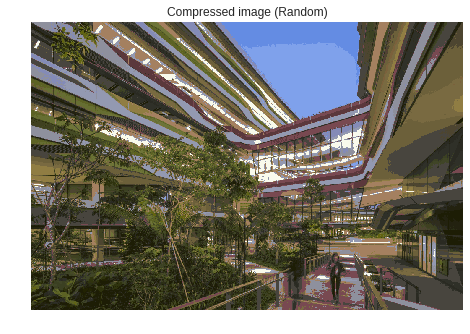

In [23]:
plt.figure(1)
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (Random)')
plt.imshow(recreate_image(random_palette, random_labels, w, h))
plt.show()

**(c) Given a cluster {x(1), x(2),...,x(m)
} of points, prove that the point z minimizing
Xm
i=1
kx(i)
zk2
is the centroid
z = 1
m
Xm
i=1
x(i)
.**

TODO: ANSWER

# Logistic Regression

In [1]:
# upload files to colab
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import pandas as pd
import io

X_data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
X_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [0]:
X_valid = X_data.sample(frac=0.2,random_state=200)
X_train = X_data.drop(X_valid.index)
Y_data = X_data["Survived"]
Y_valid = X_valid["Survived"]
Y_train = X_train["Survived"]
ID_test = X_test["PassengerId"]


In [4]:
from IPython.display import display
display(X_data.head())
display(X_data.describe())
display(X_test.head())
display(X_test.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [0]:
df = X_train
df.drop(["Survived"],axis=1,inplace=True,errors="ignore")
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

Replacing NaN values with mean/meadians.

In [0]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
df["Fare"].fillna(df["Fare"].median(),inplace=True)
df["Age"].fillna(df["Age"].mean(),inplace=True)

One-hot encoding for categories for sex and Pclass

In [0]:
df = df.join(pd.get_dummies(df["Embarked"]))
df.drop(["Embarked"],axis=1,inplace=True)
df = df.join(pd.get_dummies(df["Sex"]))
df.drop(["Sex"], axis=1, inplace=True)
df = df.join(pd.get_dummies(df["Pclass"]))
df.drop(["Pclass"], axis=1, inplace=True)

**Sanity Check**

In [8]:
display(df.head())


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
5,29.449243,0,0,8.4583,0,1,0,0,1,0,0,1


Adding new category if passenger travelling with family

In [0]:
df.loc[:,"Family"] = df["SibSp"] | df["Parch"]
df.loc[:,"Child"] = (df["Age"] < 16).astype(int)

In [10]:
display(df.head(10))


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,0,0
3,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0,1,0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0,0
5,29.449243,0,0,8.4583,0,1,0,0,1,0,0,1,0,0
6,54.000000,0,0,51.8625,0,0,1,0,1,1,0,0,0,0
7,2.000000,3,1,21.0750,0,0,1,0,1,0,0,1,3,1
10,4.000000,1,1,16.7000,0,0,1,1,0,0,0,1,1,1
11,58.000000,0,0,26.5500,0,0,1,1,0,1,0,0,0,0
12,20.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0,0


In [0]:
def preprocess(df):
  df.drop(["Survived"],axis=1,inplace=True,errors="ignore")
  df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

  df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
  df["Fare"].fillna(df["Fare"].median(),inplace=True)
  df["Age"].fillna(df["Age"].mean(),inplace=True)

  df = df.join(pd.get_dummies(df["Embarked"]))
  df.drop(["Embarked"],axis=1,inplace=True)
  df = df.join(pd.get_dummies(df["Sex"]))
  df.drop(["Sex"], axis=1, inplace=True)
  df = df.join(pd.get_dummies(df["Pclass"]))
  df.drop(["Pclass"], axis=1, inplace=True)

  df.loc[:,"Family"] = df["SibSp"] | df["Parch"]
  df.loc[:,"Child"] = (df["Age"] < 16).astype(int)
  return df

**(a) Run the following statements, and print out the displayed information.
**

In [12]:
X_valid = X_data.sample(frac=0.2,random_state=200)
X_train = X_data.drop(X_valid.index)

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_data = preprocess(X_data)
X_test = preprocess(X_test)

display(X_train.head())
display(X_valid.head())
display(X_data.head())
display(X_test.head())

,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,0,0
3,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0,1,0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0,0
5,29.449243,0,0,8.4583,0,1,0,0,1,0,0,1,0,0


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
659,58.000000,0,2,113.2750,1,0,0,0,1,1,0,0,2,0
525,40.500000,0,0,7.7500,0,1,0,0,1,0,0,1,0,0
828,30.671233,0,0,7.7500,0,1,0,0,1,0,0,1,0,0
753,23.000000,0,0,7.8958,0,0,1,0,1,0,0,1,0,0
518,36.000000,1,0,26.0000,0,0,1,1,0,0,1,0,1,0


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,0
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0


,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0,0
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1,1,0


**(b) Using LogisticRegression from the sklearn.linear_model module, fit a classifier
to the training set X_train and Y_train. Evaluate the accuracy of the classifier
via the validation set X_valid and Y_valid. What is the score?**

In [0]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression().fit(X_train, Y_train)

In [14]:
score = logreg_model.score(X_valid, Y_valid)
print(score)

0.7696629213483146


**(c) Fit a classifier to the data X_data and Y_data. What is the value of the parameter
vector ✓ = (✓0, ✓1,..., ✓d)?**

In [0]:
import pandas as pd
import io
from sklearn.preprocessing import MinMaxScaler


# normalise age
def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
def normalize_fare(data):
    scaler = MinMaxScaler()
    data["Fare"] = scaler.fit_transform(data["Fare"].values.reshape(-1,1))
    return data

X_data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
Y_data = X_data["Survived"]



X_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

X_valid = X_data.sample(frac=0.2,random_state=200)
X_train = X_data.drop(X_valid.index)
Y_valid = X_valid["Survived"]
Y_train = X_train["Survived"]

X_data = preprocess(X_data)
# X_data = normalize_age(X_data)
# X_data = normalize_fare(X_data)

X_valid = preprocess(X_valid)
# X_valid = normalize_age(X_valid)
# X_valid = normalize_fare(X_valid)

X_train = preprocess(X_train)
# X_train = normalize_age(X_train)
# X_train = normalize_fare(X_train)

X_test = preprocess(X_test)
# X_test = normalize_age(X_test)
# X_test = normalize_fare(X_test)


Fitting LogisticRegression to entire training set. I attempted normalising age and fare, but accuracy dropped as a result.

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
log_reg.fit(X_data, Y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**(d) Pedict based on test data set and create a submission file**

In [0]:
Y_test = log_reg.predict(X_test)
ans = pd.DataFrame({"PassengerId": ID_test, "Survived": Y_test})
ans.to_csv("submit.csv", index = False)
files.download("submit.csv")

# Kaggle Score

*   LogReg score: 0.77033
*   UserID: charleswongzx

Better model GradientBoostClassifier found below after some investigation:

*   GBC score: 0.78947




Logistic regression gave a decent accuracy result. I decided to compare the performance of different classifiers from different libs. Testing schema credit: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

In [88]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%



#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = Y_data.copy(deep=True)


#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    print(X_data.shape, Y_data.shape)
    cv_results = model_selection.cross_validate(alg, X_data, Y_data, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_data, Y_data)
    MLA_predict[MLA_name] = alg.predict(X_data)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)
(891, 14) (891,)
(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib

(891, 14) (891,)
(891, 14) (891,)
(891, 14) (891,)
(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning

(891, 14) (891,)
(891, 14) (891,)
(891, 14) (891,)
(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you n

(891, 14) (891,)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.91236,0.833582,0.053964,0.0760332
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.8897,0.832836,0.0726837,0.0327417
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.813296,0.805597,0.0449019,0.341184
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.96779,0.805597,0.0689047,0.0205604
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.96779,0.802612,0.0540221,0.0158415
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.811049,0.801866,0.0516505,0.00379632
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.840262,0.801866,0.0643924,0.0731799
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.807491,0.800746,0.0472807,0.00441558
12,GaussianNB,{'priors': None},0.807865,0.792537,0.0757895,0.00263412
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.98633,0.789925,0.0600839,0.0152274


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Algorithm')

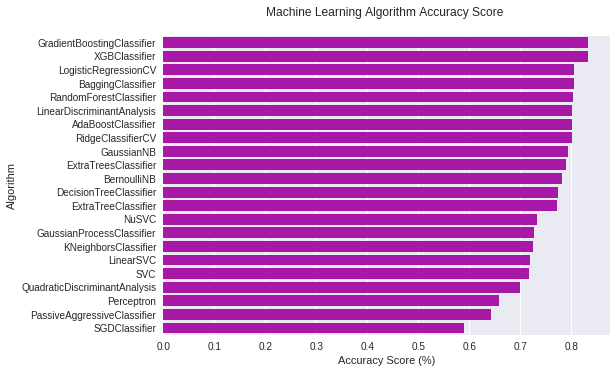

In [89]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

It appears GradientBoostingClassifier gave the best results. This is using all library defaults with no additional hyper-parameter tuning of my own.

In [0]:
from sklearn import ensemble

gbc = ensemble.GradientBoostingClassifier().fit(X_data, Y_data)
Y_test = gbc.predict(X_test)
ans = pd.DataFrame({"PassengerId": ID_test, "Survived": Y_test})
ans.to_csv("gbc_submit.csv", index = False)
files.download("gbc_submit.csv")